In [1]:
import matplotlib
%matplotlib inline
from pylab import *
from readsnapsgl import readsnap
import caesar
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

In [2]:
from scipy.spatial import cKDTree

In [3]:
ds=caesar.load('/home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0001/Caesar_snap_128.hdf5')

yt : [INFO     ] 2021-02-03 15:43:47,894 Opening /home2/weiguang/data6/CL300_Caesar/NewMDCLUSTER_0001/Caesar_snap_128.hdf5
yt : [INFO     ] 2021-02-03 15:43:48,192 Found 3034 halos
yt : [INFO     ] 2021-02-03 15:43:48,206 Found 1784 galaxies


In [5]:
pos=readsnap('/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5','Coordinates')
mas=readsnap('/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5','Masses')

reading files:  ['/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5']
Reading /home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5 file with Header
Reading file  /home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5  with data block  Coordinates  for type  None
reading files:  ['/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5']
Reading /home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5 file with Header
Reading file  /home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5  with data block  Masses  for type  None


In [9]:
idtp=readsnap('/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5','IDTP')

reading files:  ['/home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5']
Reading /home2/weiguang/data7/Gizmo-Simba/NewMDCLUSTER_0001/snap_128.hdf5 file with Header


In [6]:
tree=cKDTree(pos)

In [7]:
ids=tree.query_ball_point(ds.halos[0].minpotpos*0.6777,ds.halos[0].virial_quantities['r200c']*0.6777)

In [10]:
c_dm_pos=pos[idtp==1][ds.halos[0].dmlist]

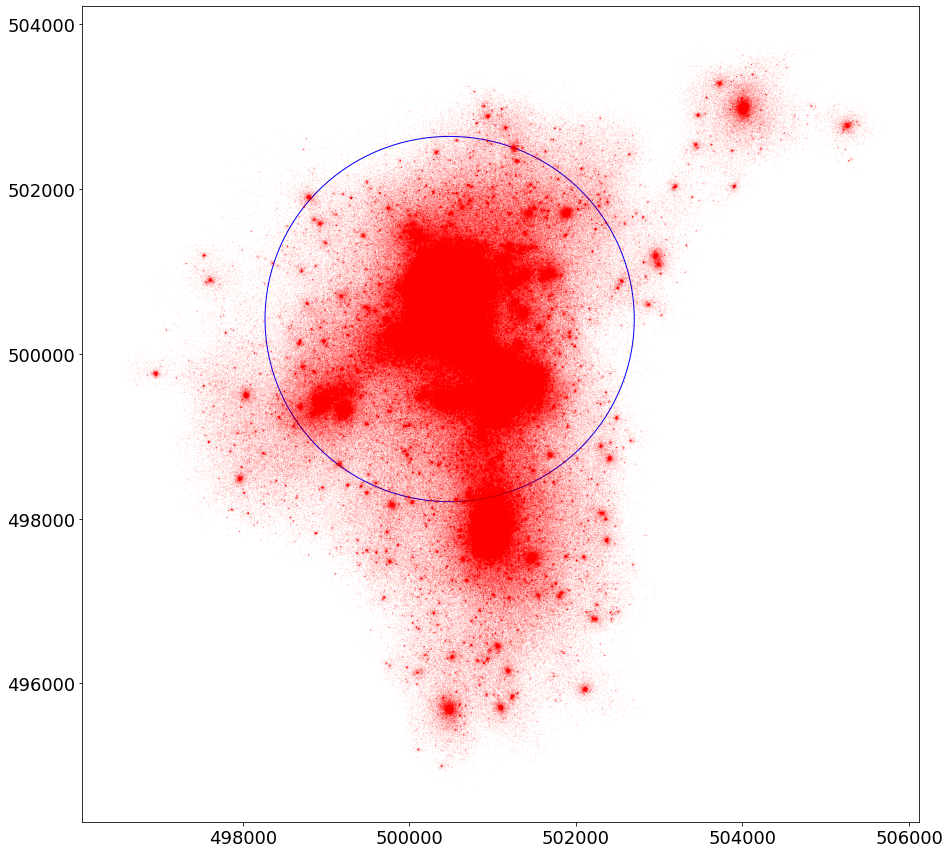

In [19]:
fig=figure(figsize=(15,15))
ax=fig.add_subplot(111)
ax.plot(c_dm_pos[:,0],c_dm_pos[:,1],'r.',ms=0.03)
circle = plt.Circle((ds.halos[0].minpotpos[0]*0.6777, ds.halos[0].minpotpos[1]*0.6777), ds.halos[0].virial_quantities['r200c']*0.6777, color='b', fill=False)
ax.add_patch(circle)

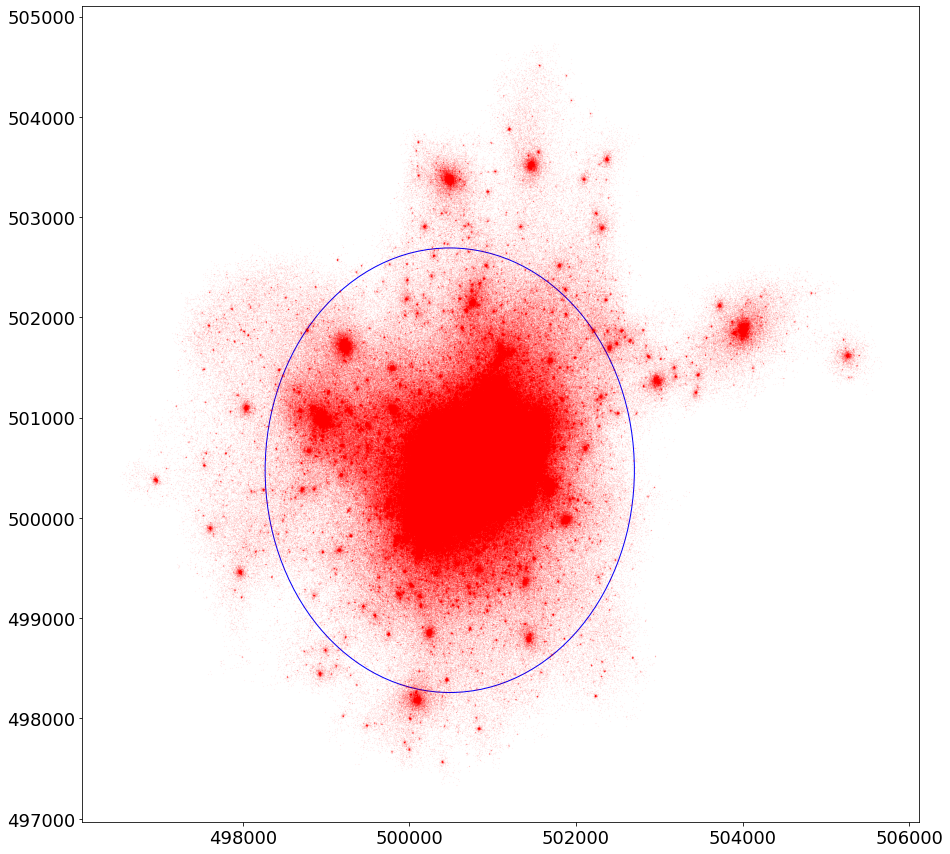

In [20]:
fig=figure(figsize=(15,15))
ax=fig.add_subplot(111)
ax.plot(c_dm_pos[:,0],c_dm_pos[:,2],'r.',ms=0.03)
circle = plt.Circle((ds.halos[0].minpotpos[0]*0.6777, ds.halos[0].minpotpos[2]*0.6777), ds.halos[0].virial_quantities['r200c']*0.6777, color='b', fill=False)
ax.add_patch(circle)

In [21]:
dmids=np.where(idtp[ids]==1)[0]

In [22]:
from match2arr import match2arr

In [24]:
idm=match2arr(dmids,ds.halos[0].dmlist)

In [29]:
dmids.shape, idm

((1761838,), (630167, array([-1, -1, -1, ..., -1, -1, -1], dtype=int32)))

In [31]:
#total cluster position and masses
c_pos=pos[idtp==0][ds.halos[0].glist]
c_mas=mas[idtp==0][ds.halos[0].glist]

c_pos=np.append(c_pos,pos[idtp==1][ds.halos[0].dmlist], axis=0)
c_mas=np.append(c_mas,mas[idtp==1][ds.halos[0].dmlist])

c_pos=np.append(c_pos,pos[idtp==4][ds.halos[0].slist], axis=0)
c_mas=np.append(c_mas,mas[idtp==4][ds.halos[0].slist])

c_pos=np.append(c_pos,pos[idtp==5][ds.halos[0].bhlist], axis=0)
c_mas=np.append(c_mas,mas[idtp==5][ds.halos[0].bhlist])

In [32]:
c_tree=cKDTree(c_pos)

In [33]:
c_ids=c_tree.query_ball_point(ds.halos[0].minpotpos*0.6777,ds.halos[0].virial_quantities['r200c']*0.6777)

In [35]:
c_mas[c_ids].sum(),mas[ids].sum(),ds.halos[0].virial_quantities['m200c']*0.6777

(253345.17, 261942.39, unyt_quantity(2.53345124e+15, 'Msun'))

# Conclusion: the M200c in Ceasar is not very trusty (depending on what you want to do).

It is not very clear the real cause behind this, it is caused by part of the particles are not included in the Caesar calculation (only use FoF particles to do the calculation). But the real reason behind this is not clear, can either be the halo is elongated and r200c is outside, or some low dense particles are not linked by FoF, or both.

This is applies to all the SO halos that depending on FoF halos.